In [31]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [35]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) ==6 ).all()


In [34]:
len(results)

1700

In [52]:
#  3. Convert the June temperatures to a list

temps = [y for (x, y) in results]

In [66]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(temps, columns =['June Temps'])
june_df.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [67]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [44]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) ==12 ).all()

In [45]:
len(dec_results)

1517

In [68]:
# 7. Convert the December temperatures to a list.
dec_temps = [y for (x,y) in dec_results]

In [69]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['December Temps'])
dec_temps_df.head()

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [70]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

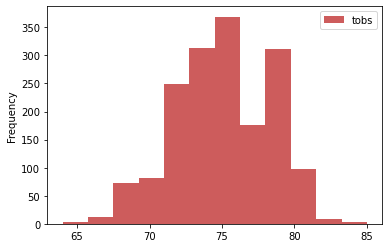

In [86]:
June_plot_df = pd.DataFrame(results)
June_plot_df.plot.hist(bins=12, color='indianred')


<AxesSubplot:ylabel='Frequency'>

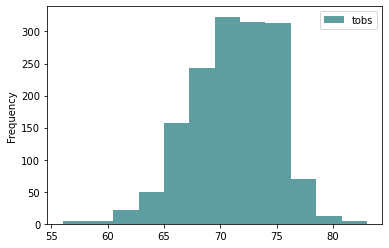

In [87]:
dec_plot_df = pd.DataFrame(dec_results)
dec_plot_df.plot.hist(bins=12, color = 'cadetblue')
